In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn import metrics

In [88]:
%matplotlib notebook

In [90]:
df = pd.read_csv('data/data-v17-25-19-15-06-21_cleaned.csv',encoding= 'ISO-8859-8')
df
df = df.loc[df['City'] == 'rehovot']
df = df.dropna(subset = ['PricePerSq'])
df = df[['Date','DealYear','PricePerSq']]
df['PricePerSq'] = df['PricePerSq'].astype(int)
df['DealYear'] = df['DealYear'].astype(int)



In [91]:
df  = df[['DealYear','PricePerSq']]
df

,DealYear,PricePerSq
10535,2010,13425
10536,2010,13109
10537,2010,11985
10538,2010,11090
10539,2010,18000
...,...,...
11793,2020,17272
11794,2020,17272
11795,2020,17523
11796,2020,16843


<IPython.core.display.Javascript object>


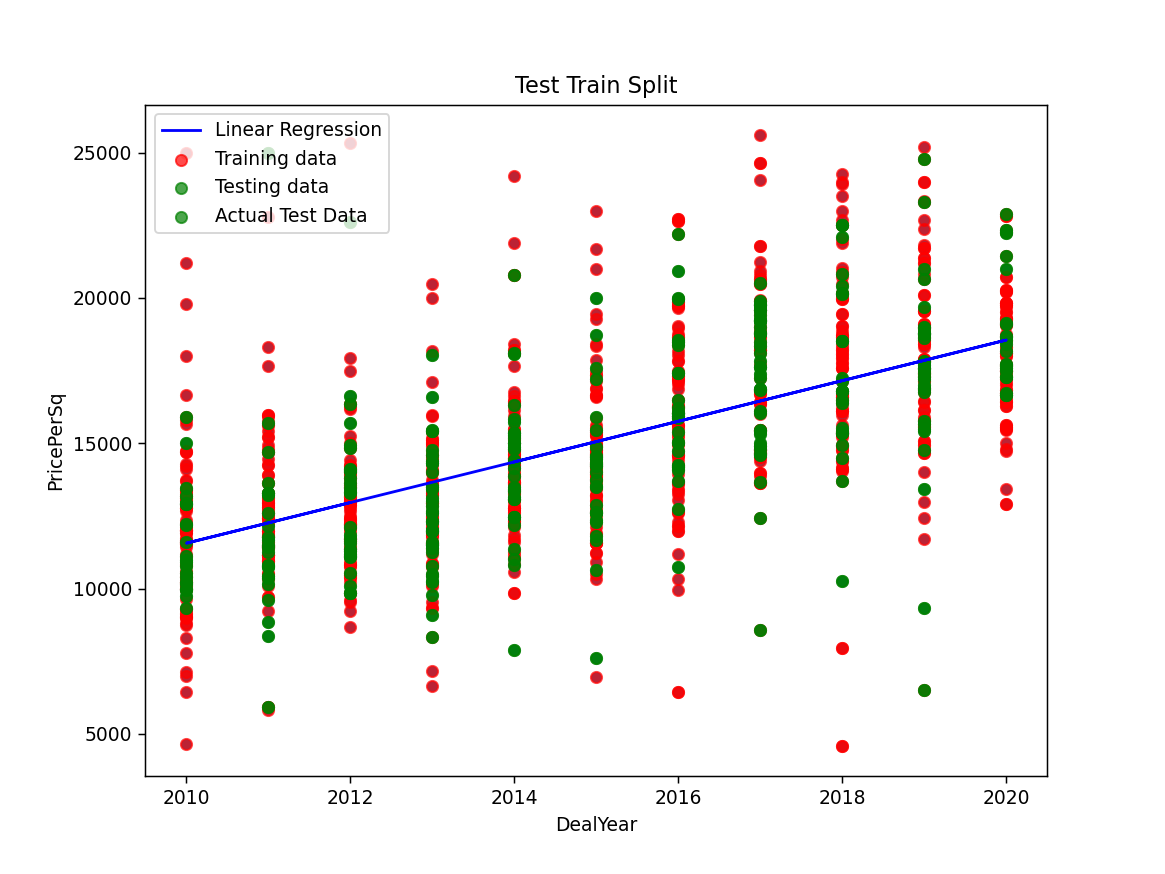

<AxesSubplot:xlabel='DealYear', ylabel='PricePerSq'>

In [92]:
df.plot(kind='scatter',x='DealYear',y='PricePerSq')

In [93]:
x_train, x_test, y_train, y_test = train_test_split(df.DealYear, df.PricePerSq)

In [94]:
plt.scatter(x_train, y_train, label='Training data', color='r', alpha=.7)
plt.scatter(x_test, y_test, label='Testing data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [95]:
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1),y_train.values)

LinearRegression()

In [96]:
prediction = LR.predict(x_test.values.reshape(-1,1))

plt.plot(x_test, prediction, label='Linear Regression', color='b')
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [97]:
LR.predict(np.array([[2030]]))[0]

25538.479049961315

In [98]:
LR.predict(np.array([[2020]]))[0]

18550.66488126293

In [101]:
metrics.r2_score(y_test,prediction)

0.4233244825411676

In [102]:
a = LR.coef_
b= LR.intercept_

In [103]:
a

array([698.78141687])

In [104]:
b

-1392987.797195817